# GeneralAssembly Python Unit Lab

In this lab, you will use Pandas and other Python libraries to generate and communicate business insights from a dataset.

You will have the entire class period to complete the lab. At the end of class, you will share your final deliverable with your instructor for review. You may choose to work on the lab individually or with your classmates, but each person must turn in their own work.

### Dataset Options

Choose one of the three options below for your lab:


| **Data Set** | **Problem Statement** |
| :-- | :--| 
| **Option #1: [Grocery Sales](https://drive.google.com/drive/folders/1ee2aA6pphm6-54f2AT8Tv6U7h7nhIjnB?usp=sharing)** | A grocery sales company is looking for patterns in their sales data regarding regions, sales reps, and product categories. Conduct an analysis to surface any notable patterns, particularly related to sales results. |  
| **Option #2: [Home Credit](https://drive.google.com/drive/folders/1MmI0NC4m0EJPbZ8UoICd1-xlXn59A0R7?usp=sharing)** | Home Credit is looking for patterns in their data regarding the default risk of consumer loans. Conduct an analysis to surface any notable patterns related to default risk. | 
| **Option #3: [College Board](https://drive.google.com/drive/folders/1oVT9IhblWOoIt4Gamg4gSOyECHKJaDjc?usp=sharing)** | A new format for the SAT was released in March 2016. As a consultant for the College Board — the company that administers the SAT — you are tracking statewide participation to recommend where to spend money to improve SAT participation rates. Conduct an analysis to make a recommendation on how the College Board can increase participation in a state of your choice. | 

### Deliverables

No matter what dataset you choose, you will submit a Jupyter notebook containing:

* Imported data, including at least two data frames and at least one combination of data frames via methods such as joining.
* Functions for cleaning the data set, with explanations for how null values are being handled in each field.
* At least two visualizations accompanied by textual descriptions of the business insights they communicate.

## Option 1: Grocery Sales

Our goal is to analyze this dataset and explore for notable patterns, particularly related to sales results.  To do so, we will follow the given process:

1. Look at the complete dataset and identify an approach.
1. Clean the data with rationale-backed handling of null or missing values.
1. Join the datasets together into a single dataframe.
1. Analyze sales results and supply chain logistics in relation to other data points of your choosing.

### 1. Look At The Data!

By printing the first few columns of each dataset, we can see how they might be combined to open up opportunities for analysis.  To do this, we need to import libraries, load the datasets into variables, and print their heads.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display plots in the Jupyter notebook
%matplotlib inline

# import datasets (you may have to change the directory/file names)
# note the encoding option to deal with a read error!
cities = pd.read_csv('cities.csv', encoding = 'ISO-8859-1', engine='python')
customers = pd.read_csv('customers.csv', encoding = 'ISO-8859-1', engine='python')
item_master = pd.read_csv('item_master.csv', encoding = 'ISO-8859-1', engine='python')
sales = pd.read_csv('sales.csv', encoding = 'ISO-8859-1', engine='python')
sales_rep = pd.read_csv('sales_rep.csv', encoding = 'ISO-8859-1', engine='python')

# as an example, print the first rows of sales using the head() method
sales.head(5)

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
0,3428,-513.15,10012226,1/12/2012,-573.3835,1/12/2012,318960,Cutting Edge Sliced Ham,10696,-37.29,115785,1/12/2012,-550.44,-1.0,180
1,3429,-105.93,10012226,1/12/2012,-204.6638,1/12/2012,318960,Washington Cranberry Juice,10009,-90.54,115785,1/12/2012,-196.47,-2.0,180
2,3430,-88.07,10012226,1/12/2012,-165.8016,1/12/2012,318960,Moms Sliced Ham,10385,-71.10,115785,1/12/2012,-159.17,-3.0,180
3,3431,-43.12,10012226,1/12/2012,-118.3703,1/12/2012,318960,Tip Top Lox,10215,-70.52,115785,1/12/2012,-113.64,-1.0,180
4,3432,-37.98,10012226,1/12/2012,-102.3319,1/12/2012,318960,Just Right Beef Soup,10965,-60.26,115785,1/12/2012,-98.24,-1.0,180


The `sales` dataset has 15 columns, as shown above.  While it contains a lot of information, we can use the other datasets to add detail to these rows.  In order to see some possible connections, it may be helpful to visualize the columns in each dataset.  I have constructed the following un-connected diagram:
<img src='./GroceryColumns.png'>

From this, we may propose some connections, as shown in the following schema diagram:
<img src='./GrocerySchema.png'>

The above connections leverage the following links:
1. Geographic information from the `City Code` column in `cities`, connected through the `customers` dataset.
1. Product information from the `item_master` dataset, using the shared `Item Number` column.
1. Managerial information from the `sales_rep` dataset, leveraging the `Sales Rep ID` and `Sales Rep Number` columns

Already, some initial questions may be formulated:

1. How do total sales vary across geographic regions?
1. What item categories comprise the bulk of sales volume?
1. What managers are linked to salespeople with the highest totals?

In order to conduct analysis and produce some potential answers, we need to clean and join the datasets.

In [9]:
cities[cities["Desc"].isnull() == True]

,City,City Code,Region,Latitude,Longitude,Desc
94,Yokohama,95,Japan,35.455592,139.572196,NaN


In [16]:
sales["Date"]

'6/26/2014'

### 2. Clean The Data!

For each dataset, we will:
1. Identify columns with null values by printing null totals.
2. inspect columns with null values to determine what kind of data they contain.
3. Decide how to address the nulls based on what replacement method is most appropriate.
4. Check that date columns are actually dates, and convert them if not!

In [17]:
# check the number of null values, by column, in each dataset
print('Null Values by Column - \'cities\' Dataset')
print(cities.isnull().sum().sort_values(ascending=False), '\n')

#1. Identify columns with null values by printing null totals.
    #cities.isnull().sum()
#2. inspect columns with null values to determine what kind of data they contain.
    #cities[cities["Desc"].isnull() == True]
#3. Decide how to address the nulls based on what replacement method is most appropriate.
########################################################################################################
    #in this case, Desc should stands for description, hence, the null data should describe the location
    #Yokohama, Japan, lat 35.455592 and long 139.572196 
    #https://www.gps-coordinates.net/
    #unnamed road, Hodogaya Ward, Yokohama, Kanagawa Prefecture 231-0017, Japan
    #TODO ANS: "Hodogaya Ward,Yokohama City,Kanagawa Prefecture,JP"
########################################################################################################
#4. Check that date columns are actually dates, and convert them if not!
    #check in sales.csv 
    



print('Null Values by Column - \'customers\' Dataset')
print(customers.isnull().sum().sort_values(ascending=False), '\n')

print('Null Values by Column - \'item_master\' Dataset')
print(item_master.isnull().sum().sort_values(ascending=False), '\n')

print('Null Values by Column - \'sales\' Dataset')
print(sales.isnull().sum().sort_values(ascending=False), '\n')

print('Null Values by Column - \'sales_rep\' Dataset')
print(sales_rep.isnull().sum().sort_values(ascending=False), '\n')

Null Values by Column - 'cities' Dataset
Desc         1
City         0
City Code    0
Region       0
Latitude     0
Longitude    0
dtype: int64 

Null Values by Column - 'customers' Dataset
Customer           0
Customer Number    0
City Code          0
dtype: int64 

Null Values by Column - 'item_master' Dataset
Item Number          0
Product Group        0
Product Line         0
Product Sub Group    0
Product Type         0
dtype: int64 

Null Values by Column - 'sales' Dataset
%KEY                      0
Cost                      0
Customer Number           0
Date                      0
GrossSales                0
Invoice Date              0
Invoice Number            0
Item Desc                 0
Item Number               0
Margin                    0
Order Number              0
Promised Delivery Date    0
Sales                     0
Sales Qty                 0
Sales Rep Number          0
dtype: int64 

Null Values by Column - 'sales_rep' Dataset
Sales Rep Name3    25
Sales Rep Name2

In [21]:
print(sales_rep.isnull().sum().sort_values(ascending=False), '\n')
print("*****sum of null******")
sales_rep.isnull().sum()

Sales Rep Name3    25
Sales Rep Name2     5
Manager             0
Manager Number      0
Path                0
Sales Rep Name      0
Sales Rep Name1     0
Sales Rep ID        0
dtype: int64 

sum of null


Manager             0
Manager Number      0
Path                0
Sales Rep Name      0
Sales Rep Name1     0
Sales Rep Name2     5
Sales Rep Name3    25
Sales Rep ID        0
dtype: int64

#### This dataset appears to have zero nulls, for our purposes.

The `Desc` column of the `cities` is a long-form description of the city, which is not necessary for our analysis.  The `sales_rep` dataset's nulls are all in the `Sales Rep Name2` and `Sales Rep Name3` columns, which indicates that there are some rows where only one salesperson was involved.

For example, let's investigate further by printing out rows, even though no replacement is necessary.

In [22]:
# print out the rows in the 'cities' dataset where `Desc` is null
cities_null_mask = cities["Desc"].isnull()
print(cities[cities_null_mask], '\n')

# print out the null rows in the 'sales_rep' dataset where `Sales Rep Name2` or `Sales Rep Name3` is Null
sales_rep_null_mask = sales_rep["Sales Rep Name2"].isnull() | sales_rep["Sales Rep Name3"].isnull()
print(sales_rep[sales_rep_null_mask])

        City  City Code Region   Latitude   Longitude Desc
94  Yokohama         95  Japan  35.455592  139.572196  NaN 

           Manager  Manager Number                             Path  \
0     Amanda Honda             104        Amanda Honda-Amalia Craig   
1     Amanda Honda             104          Amanda Honda-Cart Lynch   
2     Amanda Honda             104      Amanda Honda-Molly McKenzie   
3     Amanda Honda             104         Amanda Honda-Sheila Hein   
4    Brenda Gibson             109     Brenda Gibson-Dennis Johnson   
5    Brenda Gibson             109        Brenda Gibson-Ken Roberts   
6    Brenda Gibson             109         Brenda Gibson-Robert Kim   
7    Brenda Gibson             109     Brenda Gibson-William Fisher   
21       John Greg             134          John Greg-David Laychak   
22       John Greg             134          John Greg-Kathy Clinton   
23       John Greg             134          John Greg-Sandra Barone   
24       John Greg          

In [23]:
# get information about datatypes
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96466 entries, 0 to 96465
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   %KEY                    96466 non-null  int64  
 1   Cost                    96466 non-null  float64
 2   Customer Number         96466 non-null  int64  
 3   Date                    96466 non-null  object 
 4   GrossSales              96466 non-null  float64
 5   Invoice Date            96466 non-null  object 
 6   Invoice Number          96466 non-null  int64  
 7   Item Desc               96466 non-null  object 
 8   Item Number             96466 non-null  int64  
 9   Margin                  96466 non-null  float64
 10  Order Number            96466 non-null  int64  
 11  Promised Delivery Date  96466 non-null  object 
 12  Sales                   96466 non-null  float64
 13  Sales Qty               96466 non-null  float64
 14  Sales Rep Number        96466 non-null

Note that the `Date`, `Invoice Date`, `Item Desc`, and `Promised Delivery Date` columns are **objects**, not dates.  We don't need the `Item Desc` column, and will choose the `Date` column as our only date column for this analysis.

So, we will convert the `Date` column to datetime and drop the others.

In [38]:
# convert the `Date` column to datetime, inferring the format
sales['Date'] = pd.to_datetime(sales['Date'], format= "%m/%d/%Y")

# drop the irrelevant columns
    #we want to drop Invoice Date, Item Desc, and Promised Delivery Date column hence, axis is 1 
sales.drop("Invoice Date", axis = 1, inplace = True)
sales.drop("Item Desc", axis = 1, inplace = True)
sales.drop("Promised Delivery Date", axis = 1, inplace = True)

#OR
#sales.drop([‘Invoice Date’, ‘Item Desc’, ‘Promised Delivery Date’], axis=1, inplace=True)

# get information about the new dataframe to confirm success
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96466 entries, 0 to 96465
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   %KEY              96466 non-null  int64         
 1   Cost              96466 non-null  float64       
 2   Customer Number   96466 non-null  int64         
 3   Date              96466 non-null  datetime64[ns]
 4   GrossSales        96466 non-null  float64       
 5   Invoice Number    96466 non-null  int64         
 6   Item Number       96466 non-null  int64         
 7   Margin            96466 non-null  float64       
 8   Order Number      96466 non-null  int64         
 9   Sales             96466 non-null  float64       
 10  Sales Qty         96466 non-null  float64       
 11  Sales Rep Number  96466 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 8.8 MB


In [53]:
sales.head()

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Number,Item Number,Margin,Order Number,Sales,Sales Qty,Sales Rep Number
0,3428,-513.15,10012226,2012-01-12,-573.3835,318960,10696,-37.29,115785,-550.44,-1.0,180
1,3429,-105.93,10012226,2012-01-12,-204.6638,318960,10009,-90.54,115785,-196.47,-2.0,180
2,3430,-88.07,10012226,2012-01-12,-165.8016,318960,10385,-71.10,115785,-159.17,-3.0,180
3,3431,-43.12,10012226,2012-01-12,-118.3703,318960,10215,-70.52,115785,-113.64,-1.0,180
4,3432,-37.98,10012226,2012-01-12,-102.3319,318960,10965,-60.26,115785,-98.24,-1.0,180


### 3. Join The Datasets!

As a reminder, here's the schema diagram from step 1.
<img src='./GrocerySchema.png'>
We'll use joins in Pandas to connect the datasets into one larger set.  Note that we don't have to merge the tables in their entirety, and in fact it may be advantageous to select specific columns in order to save memory.  We can use the initial questions we proposed earlier to motivate our column selection:

1. How do total sales vary across geographic regions?
1. What item categories comprise the bulk of sales volume?
1. What managers are linked to salespeople with the highest totals?

So, we'll join the following columns from each dataset into the `sales` dataset, in steps:

1. `cities` (`City`, `Region`) into `customers`
2. `customers` (`Customer`, `City`, `Region`) into `sales`
3. `item_master` (`Product Group`) into `sales`
4. `sales_rep` (`Manager`) into `sales`

Note that the shared column must be included in the list, otherwise the join will have no matches!

In [59]:
customers.head()

,Customer,Customer Number,City Code
0,A Superior System,10000453,1
1,A&B,10000456,76
2,A&G,10000457,2
3,A&R Partners,10000458,43
4,A1 Datacom Supply,10000461,77


In [61]:
cities[['City Code', 'City', 'Region']].head()

,City Code,City,Region
0,1,New York,USA
1,2,Los Angeles,USA
2,3,Chicago,USA
3,4,Houston,USA
4,5,Philadelphia,USA


In [110]:
# merge customers and cities on the shared `City Code` column
customers_cities = pd.merge(customers,
                            cities[['City Code', 'City', 'Region']],
                            how = "left",
                            left_on = "City Code",
                            right_on = "City Code")
                            #or
                            #on = "City Code"
customers_cities.head()                           

# join `customers_cities`, `item_master`, and `sales_rep` into `sales` using three successive joins
sales_with_cities = pd.merge(sales,
                        customers_cities[['Customer Number', 'Customer', 'City', 'Region']],
                        how = "left",
                        #the common column shared between the two dataframes
                        left_on = "Customer Number",
                        right_on = "Customer Number")
                        
#sales_with_cities.head()
sales_with_items = pd.merge(sales_with_cities,
                            item_master[['Item Number', 'Product Group']],
                        how = "left",
                        left_on = "Item Number",
                        right_on = "Item Number")
#sales_with_items.head()
sales_final = pd.merge(sales_with_items,
                       sales_rep[['Sales Rep ID', 'Manager']],
                        how = "left",
                        left_on = "Sales Rep Number",
                        right_on = "Sales Rep ID")

# print the head to check for a proper join
sales_final.head(-1)

#sales_with_cities.head()

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Number,Item Number,Margin,Order Number,Sales,Sales Qty,Sales Rep Number,Customer,City,Region,Product Group,Sales Rep ID,Manager
0,3428,-513.15,10012226,2012-01-12,-573.3835,318960,10696,-37.29,115785,-550.44,-1.0,180,Fill It,Sheffield,UK,Deli,180,John Davis
1,3429,-105.93,10012226,2012-01-12,-204.6638,318960,10009,-90.54,115785,-196.47,-2.0,180,Fill It,Sheffield,UK,Beverages,180,John Davis
2,3430,-88.07,10012226,2012-01-12,-165.8016,318960,10385,-71.10,115785,-159.17,-3.0,180,Fill It,Sheffield,UK,Deli,180,John Davis
3,3431,-43.12,10012226,2012-01-12,-118.3703,318960,10215,-70.52,115785,-113.64,-1.0,180,Fill It,Sheffield,UK,Seafood,180,John Davis
4,3432,-37.98,10012226,2012-01-12,-102.3319,318960,10965,-60.26,115785,-98.24,-1.0,180,Fill It,Sheffield,UK,Canned Products,180,John Davis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97215,60553,1391.91,10027381,2014-06-26,2644.1795,206882,10799,1331.60,305975,2723.51,5.0,113,Zero-Knowledge Systems,Sapporo,Japan,Produce,113,Carolyn Halmon
97216,60554,3422.87,10022167,2014-06-26,3163.4064,206776,10269,-164.56,302480,3258.31,168.0,154,Quallaby,Tulsa,USA,Alcoholic Beverages,154,Molly McKenzie
97217,60555,1946.56,10022167,2014-06-26,3675.8700,206773,10008,1839.59,302005,3786.15,100.0,154,Quallaby,Tulsa,USA,Beverages,154,Molly McKenzie
97218,60556,4845.23,10027119,2014-06-26,8696.0000,206780,10362,4111.65,304144,8956.88,16.0,109,Yurie Systems,Austin,USA,Dairy,109,Brenda Gibson


In [111]:
#merging year with sales
sales_final1 = pd.merge(sales_final,
                       sales_final["Date"].apply(lambda x: x.year),
                        how = "left",
                        left_on = "Date",
                        right_on = "Date")

ValueError: You are trying to merge on datetime64[ns] and int64 columns. If you wish to proceed you should use pd.concat

### 4. Conduct Analysis!

Here are the columns in our final dataset:

In [ ]:
for column in sales_final.columns:
    print(column)

In [85]:
sales_final[sales_final["GrossSales"] > 0][["Region","GrossSales"]]

,Region,GrossSales
9,Nordic,1.4380
10,Japan,1.7848
11,USA,3.3824
12,USA,4.5453
13,Spain,5.6549
...,...,...
97216,USA,3163.4064
97217,USA,3675.8700
97218,USA,8696.0000
97219,USA,10800.1900


#### We will use Pandas' groupby() method to segment and analyze the data in accordance with our three analysis questions:

1. How do total sales vary across geographic regions?
1. What item categories comprise the bulk of sales volume?
1. What managers are linked to salespeople with the highest totals?

In [115]:
#lambda function to isolate the year from date
year = sales_final["Date"].apply(lambda x: x.year)
print(year)
year.shape

#

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
97216    2014
97217    2014
97218    2014
97219    2014
97220    2014
Name: Date, Length: 97221, dtype: int64


(97221,)

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
97216    2014
97217    2014
97218    2014
97219    2014
97220    2014
Name: Date, Length: 97221, dtype: int64


TypeError: unhashable type: 'Series'

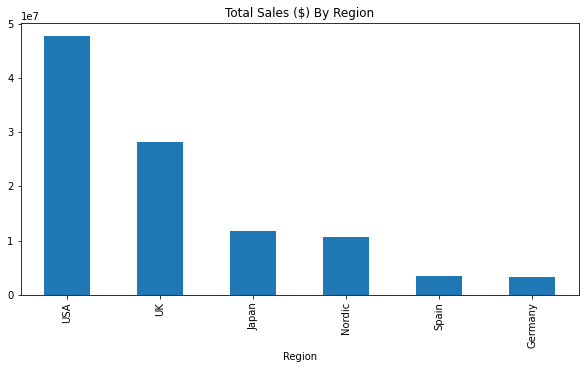

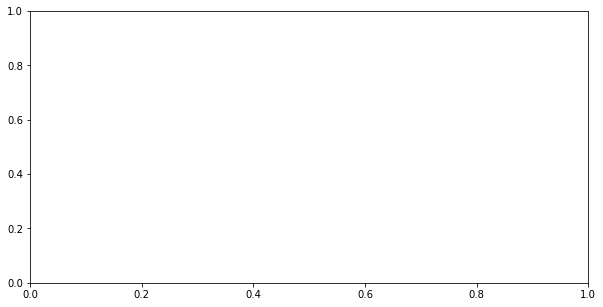

In [113]:
# total sales by geographic region
from cProfile import label


fig, ax = plt.subplots(figsize=(10, 5))
grouped_data = sales_final.groupby("Region").sum().sort_values('Sales', ascending = False)['Sales']
grouped_data.plot(ax = ax, kind = "bar")
plt.title('Total Sales ($) By Region')

# regional sales over time
fig, ax = plt.subplots(figsize=(10, 5))


grouped_data = sales_final.groupby("Region",year).sum().sort_values('Sales', ascending = False)['Sales']
grouped_data.plot(ax = ax, kind = "bar")
plt.title('Annual Sales ($) By Region')

In [ ]:
# total sales by product group
fig, ax = plt.subplots(figsize=(10, 5))
grouped_data = sales_final.groupby(____).____.sort_values('Sales', ascending = False)['Sales']
grouped_data.plot(ax = ax, kind = 'bar')
plt.title('Total Sales ($) By Product Group')

# product group sales over time
fig, ax = plt.subplots(figsize=(15, 8))
____
plt.title('Annual Sales ($) By Product Group')

In [ ]:
# total sales by manager
fig, ax = plt.subplots(figsize=(10, 5))
____
plt.title('Total Sales ($) By Manager')

# sales per manager over time
fig, ax = plt.subplots(figsize=(15, 8))
____
plt.title('Annual Sales ($) By Manager')

# sales per manager in the USA
fig, ax = plt.subplots(figsize=(15, 8))
____
plt.title('Annual USA Sales ($) By Manager in the USA')

#### So, what conclusions or hypothesis can we draw from these initial analyses?

1. The USA and UK comprise the vast majority of sales, but Japan's share of the total appears to have been increasing during the first part of 2014.

1. Produce, Canned Products, and Deli are the top three product categories, by far.  In 2014, the margin between Produce and Canned Products shrank such that Canned Products could be projected to overtake the number one spot by the end of the year.

1. Baking Goods look to be increasing their share of sales significantly, though they are still a much smaller proportion of overall sales.

1. Some managers oversee significantly more sales than others, but it is difficult to compare performance between regions; John Greg, in particular, was a very strong performer over all three years, but appears to have a much larger USA proportion of overall sales in 2013 than in 2012 or 2014.

#### Some additional exploration into the dataset could be fruitful.  Namely:

1. What proportion of a managers' salespeople are dedicated to each region, each year?  We could use this to project expected sales, and compare performance of salespeople from one manager to another in an attempt to infer managerial performance.

1. Are some individual products growing more year-over-year than others?  A breakout view of all products would be a lot of data to parse visually, but could reveal an interesting trend.

#### There are also opportunities for prediction here, using Python packages such as SciKit-Learn:

1. Using historical sales data by category, predict the remainder of sales in 2014 in order to compare the three years in the dataset more directly.

2. Quantify the mean and variance of sales by salesperson, manager, or product.  Which are most or least volatile?

3. If the company were to invest more into an existing product line, which would be most worthy?  Forecasting demand would facilitate such a decision.